In [1]:
import os

os.chdir('C:/대학원/2019-1/1.전공/2.데이터마이닝/project/도로/result')
os.getcwd()

'C:\\대학원\\2019-1\\1.전공\\2.데이터마이닝\\project\\도로\\result'

In [2]:
import pandas as pd
import numpy as np

accident = pd.read_csv('accident11.csv',encoding='utf8')

In [8]:
accident.head(5)

,발생일시,발생요일,발생시군구,도로명,사망자수,중상자수,경상자수,부상신고자수
0,2017년 4월 29일 23시,토요일,서울특별시 용산구 이촌동,강남대로,0,1,0,0
1,2017년 7월 5일 19시,수요일,서울특별시 용산구 한남동,강남대로,0,0,1,0
2,2017년 6월 24일 23시,토요일,서울특별시 용산구 한남동,강남대로,0,0,1,0
3,2017년 12월 28일 14시,목요일,서울특별시 용산구 한남동,강남대로,0,0,2,0
4,2017년 5월 21일 01시,일요일,서울특별시 용산구 한남동,강남대로,0,0,1,0


In [4]:
accident_gb = accident.groupby(by='도로명')

In [10]:
accident_new = accident_gb['사망자수','중상자수','경상자수','부상신고자수'].sum()
accident_new.head(5)

,사망자수,중상자수,경상자수,부상신고자수
도로명,,,,
4.19로,0,3,15,1
63로,0,0,3,1
가락로,0,20,50,15
가락로11길,0,1,1,0
가락로31길,0,1,0,0


In [11]:
accident_new['victims'] = accident_new['사망자수']+accident_new['중상자수']+accident_new['경상자수']+accident_new['부상신고자수']

In [12]:
accident_new.head(2)

,사망자수,중상자수,경상자수,부상신고자수,victims
도로명,,,,,
4.19로,0,3,15,1,19
63로,0,0,3,1,4


In [13]:
accident_new['severity'] = 12*accident_new['사망자수']+3*accident_new['중상자수']+3*accident_new['경상자수']+accident_new['부상신고자수']
accident_new.head(2)

,사망자수,중상자수,경상자수,부상신고자수,victims,severity
도로명,,,,,,
4.19로,0,3,15,1,19,55
63로,0,0,3,1,4,10


In [17]:
accident_new['count'] = accident_gb['발생일시'].count()

In [19]:
accident_new.head(10)

,사망자수,중상자수,경상자수,부상신고자수,victims,severity,count
도로명,,,,,,,
4.19로,0,3,15,1,19,55,13
63로,0,0,3,1,4,10,3
가락로,0,20,50,15,85,225,70
가락로11길,0,1,1,0,2,6,2
가락로31길,0,1,0,0,1,3,1
가락로42길,0,2,1,0,3,9,2
가람길,1,1,12,0,14,51,10
가로공원로,0,5,30,1,36,106,27
가로공원로56길,0,0,0,1,1,1,1


In [21]:
accident_new.to_csv("accident_new.csv",index=True)

In [22]:
import matplotlib.pyplot as plt

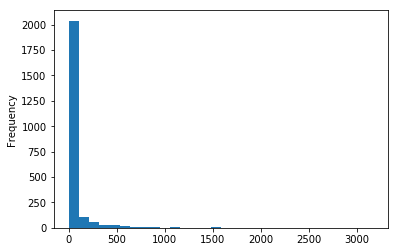

In [24]:
accident_new.severity.plot.hist(bins = 30)

In [27]:
accident_new.severity.quantile([.1,.25, .5, .75,.9])

0.10      3.0
0.25      4.0
0.50     12.0
0.75     27.0
0.90    132.0
Name: severity, dtype: float64